# Metadata Analysis of Gut Phage Database (Camarillo-Guerrero et. al) vs Metagenomic Gut Virus Database (Nayfach et. al)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
gpd = pd.read_csv('metadata/GPD_metadata.tsv', delimiter='\t')
mgv = pd.read_csv('metadata/mgv_contig_info.tsv', delimiter='\t')

In [3]:
mgv

,contig_id,votu_id,length,checkv_quality,prophage,temperate_score,virulent_score,completeness,gc,stop_codon_readthrough,baltimore,ictv_order,ictv_family,ictv_genus
0,MGV-GENOME-0364295,OTU-61123,97376,Complete,No,0.037500,0.962500,98.26,31.6166,TAG,dsDNA,Caudovirales,crAss-phage,NaN
1,MGV-GENOME-0364296,OTU-61123,97376,Complete,No,0.037500,0.962500,98.26,31.6146,TAG,dsDNA,Caudovirales,crAss-phage,NaN
2,MGV-GENOME-0364303,OTU-05782,97388,Complete,No,0.035740,0.964260,98.28,27.9706,NaN,dsDNA,Caudovirales,crAss-phage,NaN
3,MGV-GENOME-0364311,OTU-01114,97394,Complete,No,0.037500,0.962500,98.38,31.4485,TAG,dsDNA,Caudovirales,crAss-phage,NaN
4,MGV-GENOME-0364312,OTU-23935,97395,Complete,No,0.013875,0.986125,99.25,33.5777,TAG,dsDNA,Caudovirales,crAss-phage,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189675,MGV-GENOME-0231197,OTU-02316,31435,Medium-quality,Yes,0.061757,0.938243,77.67,43.0539,NaN,dsDNA,Caudovirales,Siphoviridae,NaN
189676,MGV-GENOME-0231207,OTU-33946,29879,Medium-quality,Yes,0.025000,0.975000,85.02,60.3267,NaN,dsDNA,Caudovirales,NaN,NaN
189677,MGV-GENOME-0231215,OTU-36811,31248,Medium-quality,Yes,0.237500,0.762500,79.25,64.0553,NaN,dsDNA,Caudovirales,Myoviridae,NaN
189678,MGV-GENOME-0231221,OTU-53827,32374,Medium-quality,Yes,0.987500,0.012500,79.73,40.3873,NaN,dsDNA,Caudovirales,Siphoviridae,NaN


In [4]:
gpd

,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,Metagenomic_runs_detected,Continents_detected,Countries_detected,checkV_MIUViG,checkV_completion,checkV_viral_region,checkV_host_region,checkV_prophage,checkV_termini,Novel
0,ivig_1,Isolate,40836,18045,NaN,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,37.25,1-18045,NaN,No,No,Yes
1,ivig_2,Isolate,40837,27391,NaN,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,55.71,1-26073,26074-27391,Yes,No,Yes
2,ivig_3,Isolate,17902,19198,Siphoviridae,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,23.63,5674-19198,1-5673,Yes,No,Yes
3,ivig_6,Isolate,40829,40928,NaN,GCA_003433685,Firmicutes/Bacilli/Lactobacillales/Streptococc...,NaN,NaN,NaN,High-quality,99.50,1-40928,NaN,No,No,Yes
4,ivig_7,Isolate,40827,43234,Siphoviridae,"GCA_003433685,GCA_003434265",Firmicutes/Bacilli/Lactobacillales/Streptococc...,NaN,NaN,NaN,High-quality,98.57,1-43234,NaN,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142804,uvig_598938,Metagenome,96,41074,NaN,14207_7#1,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,"SRR8180450,SRR8180446","Africa,Africa","Ethiopia,Ethiopia",Genome-fragment,72.78,1-41074,NaN,No,No,No
142805,uvig_598939,Metagenome,16114,39075,NaN,NaN,NaN,SRR8180446,Africa,Ethiopia,High-quality,91.60,1-39075,NaN,No,No,Yes
142806,uvig_598940,Metagenome,21096,34739,Siphoviridae,NaN,NaN,SRR8180446,Africa,Ethiopia,High-quality,95.29,1-34739,NaN,No,No,Yes
142807,uvig_598943,Metagenome,1427,18852,NaN,NaN,NaN,SRR8180446,Africa,Ethiopia,Genome-fragment,44.74,1-18852,NaN,No,No,No


### Genome Quality Comparisons

In [5]:
gpd_50 = gpd[gpd['checkV_completion'] >= 50]
gpd_90 = gpd[gpd['checkV_completion'] >= 90]
gpd_95 = gpd[gpd['checkV_completion'] >= 95]
mgv_50 = mgv[mgv['completeness'] >= 50]
mgv_90 = mgv[mgv['completeness'] >= 90]
mgv_95 = mgv[mgv['completeness'] >= 95]

print("NUMBER OF CONTIGS WITH QUALITY SCORES FOR EACH")
print(f'GPD: {len(gpd)}')
print(f'GPD >50: {len(gpd_50)}')
print(f'GPD >90: {len(gpd_90)}')
print(f'GPD >95: {len(gpd_95)}')
print("------------------")
print(f'MGV: {len(mgv)}')
print(f'MGV >50: {len(mgv_50)}')
print(f'MGV >90: {len(mgv_90)}')
print(f'MGV >95: {len(mgv_95)}')

NUMBER OF CONTIGS WITH QUALITY SCORES FOR EACH
GPD: 142809
GPD >50: 79889
GPD >90: 41315
GPD >95: 33838
------------------
MGV: 189680
MGV >50: 189680
MGV >90: 78814
MGV >95: 64558


In [6]:
labels, numbers =  np.unique(gpd['checkV_MIUViG'], return_counts=True)
print('GPD CheckV Labels')
for label, number in zip(labels, numbers):    
    print(f'{label}:{number}')
    
labels, numbers =  np.unique(mgv['checkv_quality'], return_counts=True)
print('\nMGV CheckV Labels')
for label, number in zip(labels, numbers):    
    print(f'{label}:{number}')


GPD CheckV Labels
Genome-fragment:101381
High-quality:41428

MGV CheckV Labels
Complete:26030
High-quality:53220
Medium-quality:110430


### Genome Length Comparisons

In [7]:
def size_stats(lengths, label):
    print(f'\nStats for {label}')
    print(f'avg: {np.average(lengths)}')
    print(f'max: {np.max(lengths)}')
    print(f'min: {np.min(lengths)}')
    print(f'std: {np.std(lengths)}')
    print(f'1Q: {np.quantile(lengths, 0.25)}')
    print(f'median: {np.median(lengths)}')
    print(f'3Q: {np.quantile(lengths, 0.75)}')


gpd_lengths = gpd['Size']
mgv_lengths = mgv['length']

gpd_lengths = gpd['Size']
mgv_lengths = mgv['length']
size_stats(gpd_lengths, 'GPD')
size_stats(mgv_lengths, 'MGV')




Stats for GPD
avg: 37586.30895811888
max: 419037
min: 10000
std: 27721.15127925798
1Q: 16927.0
median: 31198.0
3Q: 46964.0

Stats for MGV
avg: 46394.96777203712
max: 553716
min: 1244
std: 32454.65336254836
1Q: 27864.75
median: 38286.0
3Q: 53634.0


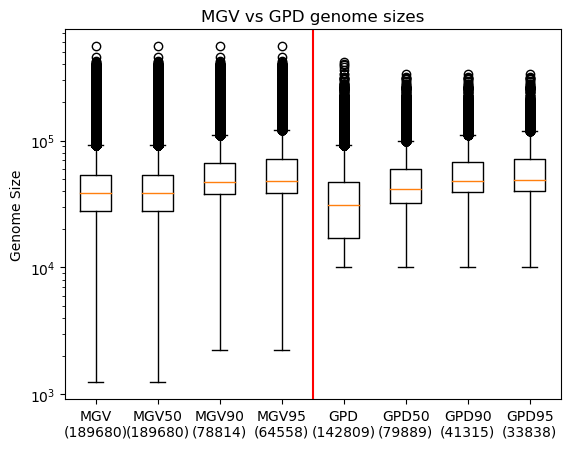

In [8]:
gpd_lengths50 = gpd_50['Size']
mgv_lengths50 = mgv_50['length']
gpd_lengths90 = gpd_90['Size']
mgv_lengths90 = mgv_90['length']
gpd_lengths95 = gpd_95['Size']
mgv_lengths95 = mgv_95['length']

fig, ax = plt.subplots()
ax.set_title('MGV vs GPD genome sizes')
ax.boxplot((mgv_lengths, mgv_lengths50, mgv_lengths90, mgv_lengths95, gpd_lengths, gpd_lengths50, gpd_lengths90, gpd_lengths95), 
           labels=(f'MGV\n({len(mgv)})', f'MGV50\n({len(mgv_50)})', f'MGV90\n({len(mgv_90)})', f'MGV95\n({len(mgv_95)})',f'GPD\n({len(gpd)})',f'GPD50\n({len(gpd_50)})',f'GPD90\n({len(gpd_90)})',f'GPD95\n({len(gpd_95)})'))
ax.set_yscale('log')
ax.set_ylabel('Genome Size')
ax.axvline(4.5, color='r')

### Taxonomy Investigations

In [9]:
gpd

,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,Metagenomic_runs_detected,Continents_detected,Countries_detected,checkV_MIUViG,checkV_completion,checkV_viral_region,checkV_host_region,checkV_prophage,checkV_termini,Novel
0,ivig_1,Isolate,40836,18045,NaN,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,37.25,1-18045,NaN,No,No,Yes
1,ivig_2,Isolate,40837,27391,NaN,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,55.71,1-26073,26074-27391,Yes,No,Yes
2,ivig_3,Isolate,17902,19198,Siphoviridae,GCA_003433665,Proteobacteria/Gammaproteobacteria/Enterobacte...,NaN,NaN,NaN,Genome-fragment,23.63,5674-19198,1-5673,Yes,No,Yes
3,ivig_6,Isolate,40829,40928,NaN,GCA_003433685,Firmicutes/Bacilli/Lactobacillales/Streptococc...,NaN,NaN,NaN,High-quality,99.50,1-40928,NaN,No,No,Yes
4,ivig_7,Isolate,40827,43234,Siphoviridae,"GCA_003433685,GCA_003434265",Firmicutes/Bacilli/Lactobacillales/Streptococc...,NaN,NaN,NaN,High-quality,98.57,1-43234,NaN,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142804,uvig_598938,Metagenome,96,41074,NaN,14207_7#1,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,"SRR8180450,SRR8180446","Africa,Africa","Ethiopia,Ethiopia",Genome-fragment,72.78,1-41074,NaN,No,No,No
142805,uvig_598939,Metagenome,16114,39075,NaN,NaN,NaN,SRR8180446,Africa,Ethiopia,High-quality,91.60,1-39075,NaN,No,No,Yes
142806,uvig_598940,Metagenome,21096,34739,Siphoviridae,NaN,NaN,SRR8180446,Africa,Ethiopia,High-quality,95.29,1-34739,NaN,No,No,Yes
142807,uvig_598943,Metagenome,1427,18852,NaN,NaN,NaN,SRR8180446,Africa,Ethiopia,Genome-fragment,44.74,1-18852,NaN,No,No,No


In [49]:

complete_label_set = list(set(list(np.unique(list(gpd['Predicted_phage_taxon'])))+list(np.unique(list(mgv['ictv_family'])))))
taxon_data = pd.DataFrame(columns=complete_label_set)

def add_data(taxon_data, data, label):
    labels, numbers = np.unique(list(data[label]), return_counts=True)
    tax = {label: number/len(data) for label, number in zip(labels, numbers)}
    taxon_data = taxon_data.append(tax, ignore_index=True)
    return taxon_data

taxon_data = add_data(taxon_data, mgv, 'ictv_family')
taxon_data = add_data(taxon_data, mgv_50, 'ictv_family')
taxon_data = add_data(taxon_data, mgv_90, 'ictv_family')
taxon_data = add_data(taxon_data, mgv_95, 'ictv_family')
taxon_data = add_data(taxon_data, gpd, 'Predicted_phage_taxon')
taxon_data = add_data(taxon_data, gpd_50, 'Predicted_phage_taxon')
taxon_data = add_data(taxon_data, gpd_90, 'Predicted_phage_taxon')
taxon_data = add_data(taxon_data, gpd_95, 'Predicted_phage_taxon')

s = taxon_data.sum()
taxon_data = taxon_data[s.sort_values(ascending=False).index]
final_data2 = taxon_data

taxon_data['Other'] = taxon_data.iloc[:, 6:-1].sum(axis=1)
final_data = taxon_data


taxon_plot_data = final_data.drop(final_data.iloc[:, 6:-1], axis=1)
taxon_plot_data2 = final_data2.drop(final_data2.iloc[:, 0:6], axis=1)
taxon_plot_data2 = taxon_plot_data2.iloc[:,:-2]
taxon_plot_data2


/tmp/ipykernel_354014/1228638893.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  taxon_data = taxon_data.append(tax, ignore_index=True)
/tmp/ipykernel_354014/1228638893.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  taxon_data = taxon_data.append(tax, ignore_index=True)
/tmp/ipykernel_354014/1228638893.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  taxon_data = taxon_data.append(tax, ignore_index=True)
/tmp/ipykernel_354014/1228638893.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  taxon_data = taxon_data.append(tax, ignore_index=True)
/tmp/ipykernel_354014/1228638893.py:7: FutureWarning: The frame.append method is dep

,Inoviridae,Papillomaviridae,Herelleviridae,Gokushovirinae,Adenoviridae,Smacoviridae,Tectiviridae,Anelloviridae,Ackermannviridae,Genomoviridae,Circoviridae,Parvoviridae,Metaviridae,Caulimoviridae,Mimiviridae
0,0.001503,0.000548,0.000137,NaN,0.000137,0.000079,0.000021,0.000042,0.000021,0.000021,0.000026,0.000011,0.000005,0.000011,0.000011
1,0.001503,0.000548,0.000137,NaN,0.000137,0.000079,0.000021,0.000042,0.000021,0.000021,0.000026,0.000011,0.000005,0.000011,0.000011
2,0.001358,0.000952,0.000203,NaN,0.000140,0.000127,0.000038,0.000063,0.000051,0.000038,0.000025,0.000025,0.000013,0.000013,NaN
3,0.001456,0.001100,0.000232,NaN,0.000170,0.000139,0.000046,0.000062,0.000062,0.000046,0.000031,0.000031,0.000015,NaN,NaN
4,NaN,NaN,0.000791,0.000091,NaN,NaN,0.000035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.000138,0.000163,NaN,NaN,0.000038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.000121,0.000315,NaN,NaN,0.000073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.000148,0.000355,NaN,NaN,0.000089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0, 0, 'MGV\n(189680)'),
 Text(1, 0, 'MGV50\n(189680)'),
 Text(2, 0, 'MGV90\n(78814)'),
 Text(3, 0, 'MGV95\n(64558)'),
 Text(4, 0, 'GPD\n(142809)'),
 Text(5, 0, 'GPD50\n(79889)'),
 Text(6, 0, 'GPD90\n(41315)'),
 Text(7, 0, 'GPD95\n(33838)')]

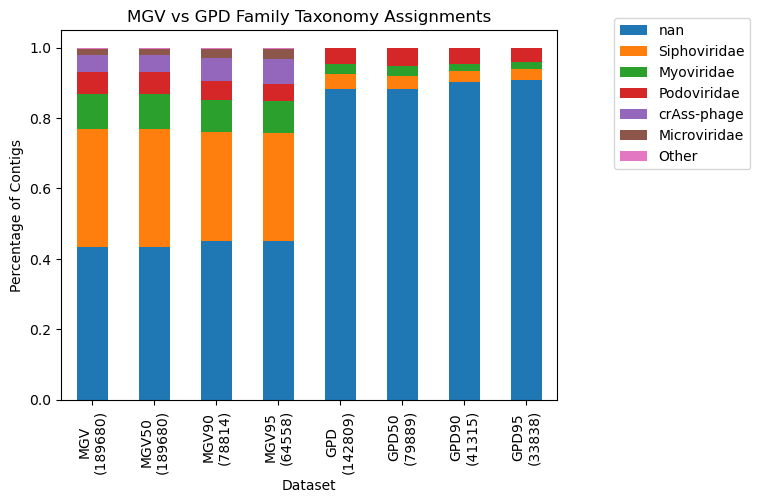

In [50]:
ax = taxon_plot_data.plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title('MGV vs GPD Family Taxonomy Assignments')
ax.set_ylabel('Percentage of Contigs')
ax.set_xlabel('Dataset')
ax.set_xticklabels([f'MGV\n({len(mgv)})', f'MGV50\n({len(mgv_50)})', f'MGV90\n({len(mgv_90)})', f'MGV95\n({len(mgv_95)})',f'GPD\n({len(gpd)})',f'GPD50\n({len(gpd_50)})',f'GPD90\n({len(gpd_90)})',f'GPD95\n({len(gpd_95)})'])

[Text(0, 0, 'MGV\n(189680)'),
 Text(1, 0, 'MGV50\n(189680)'),
 Text(2, 0, 'MGV90\n(78814)'),
 Text(3, 0, 'MGV95\n(64558)'),
 Text(4, 0, 'GPD\n(142809)'),
 Text(5, 0, 'GPD50\n(79889)'),
 Text(6, 0, 'GPD90\n(41315)'),
 Text(7, 0, 'GPD95\n(33838)')]

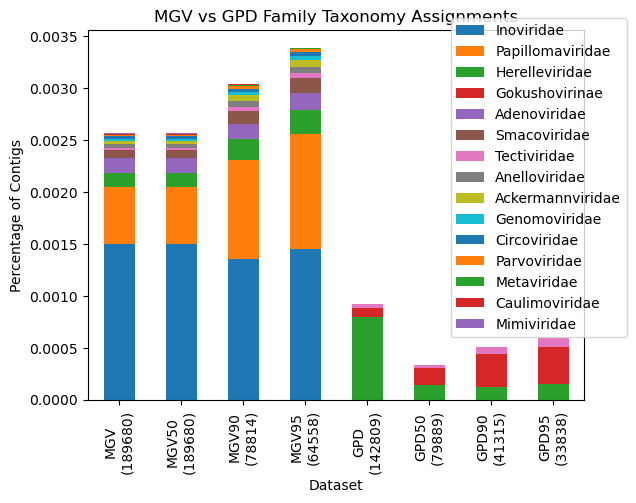

In [51]:

ax = taxon_plot_data2.plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title('MGV vs GPD Family Taxonomy Assignments')
ax.set_ylabel('Percentage of Contigs')
ax.set_xlabel('Dataset')
ax.set_xticklabels([f'MGV\n({len(mgv)})', f'MGV50\n({len(mgv_50)})', f'MGV90\n({len(mgv_90)})', f'MGV95\n({len(mgv_95)})',f'GPD\n({len(gpd)})',f'GPD50\n({len(gpd_50)})',f'GPD90\n({len(gpd_90)})',f'GPD95\n({len(gpd_95)})'])